# Imports

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Gerando (di)Grafos

In [ ]:
G = nx.Graph()    #sem direções
D = nx.DiGraph()  #direcionado

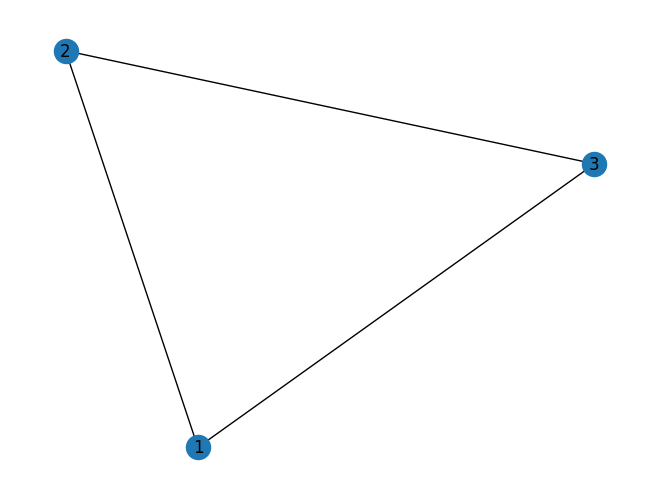

In [ ]:
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2),(2,3),(3,1)]) ## o nx já adiciona os vértices correspondentes
nx.draw(G, with_labels=True)
plt.show()

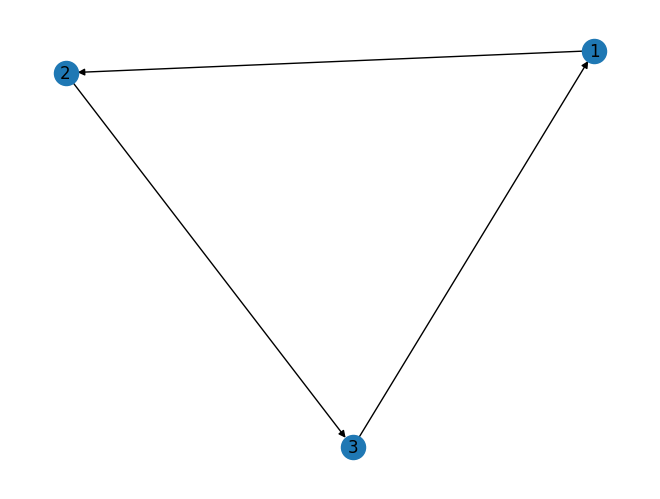

In [ ]:
#D.add_nodes_from([1,2,3])
D.add_edges_from([(1,2),(2,3),(3,1)]) ## o nx já adiciona os vértices correspondentes
nx.draw(D, with_labels=True)
plt.show()

# Salvando e Carregando Grafos

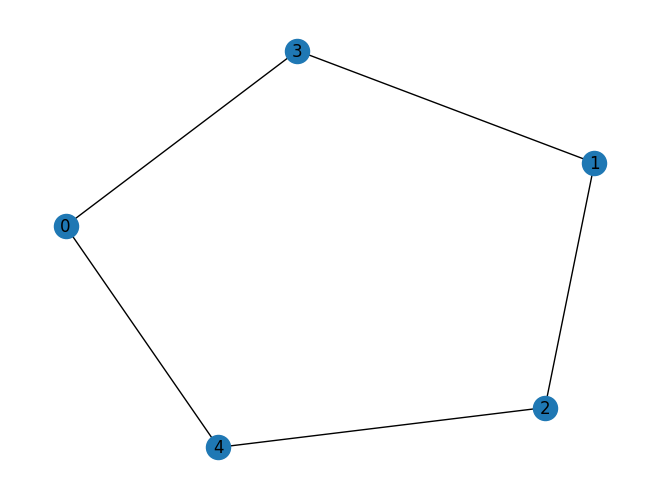

In [ ]:
G = nx.random_regular_graph(2,5)
nx.draw(G, with_labels=True)
plt.show()

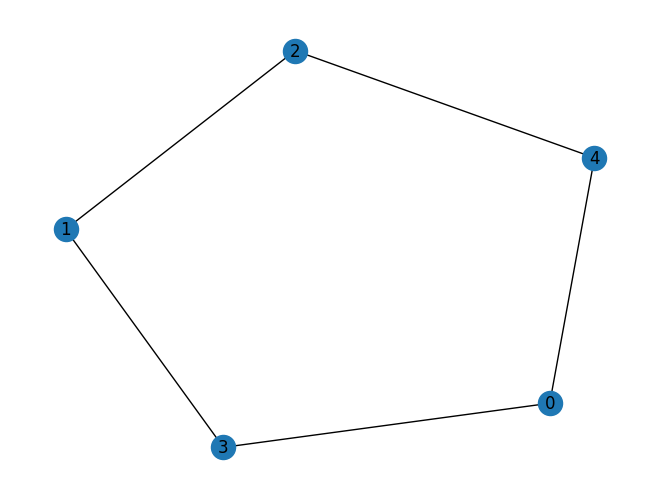

In [ ]:
nx.write_gml(G, "meuGrafo.gml")
grafoLido = nx.read_gml("meuGrafo.gml")
nx.draw(grafoLido, with_labels=True)
plt.show()

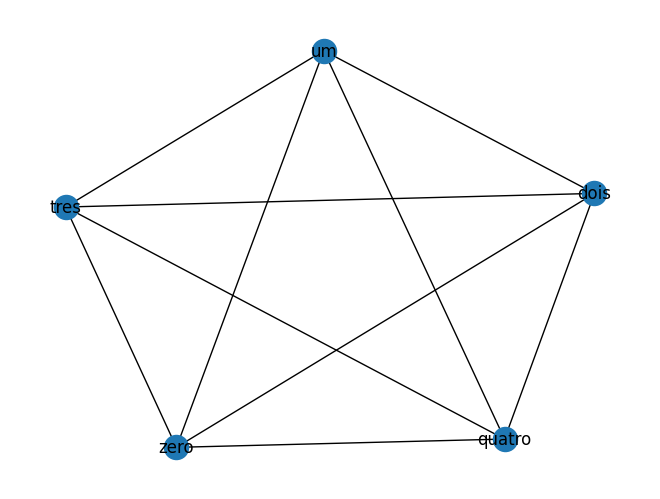

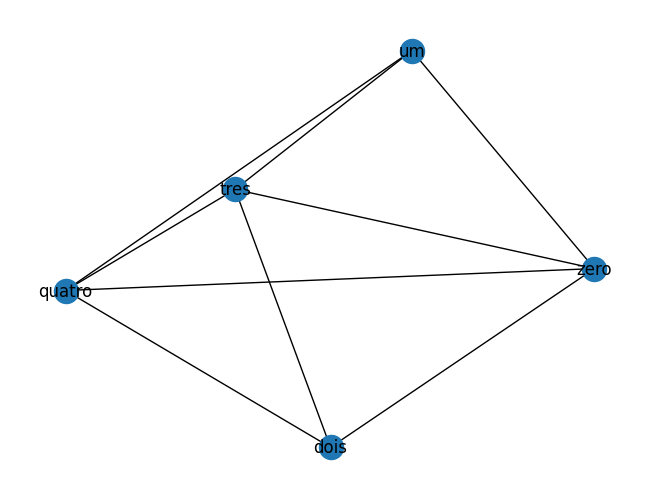

In [ ]:
grafoLido = nx.read_gml("meuGrafo.gml")
nx.draw(grafoLido, with_labels=True)
plt.show()
grafoLido.remove_edge("um","dois")
nx.draw(grafoLido, with_labels=True)
plt.show()

Exercício: Salvem arquivos nos formatos pajek e edgelist e abram ele como se fosse um .txt

Qual a estrutura de cada um? Qual é melhor? Por que?

# Plotando com Posição

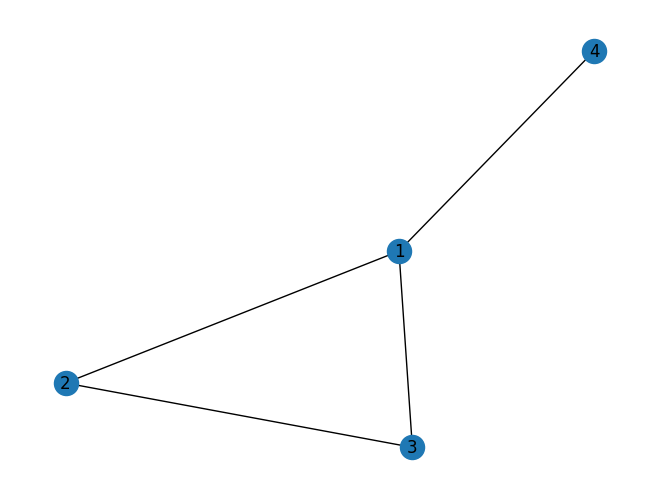

In [ ]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,1),(1,4)])
nx.draw(G, with_labels=True)
plt.show()

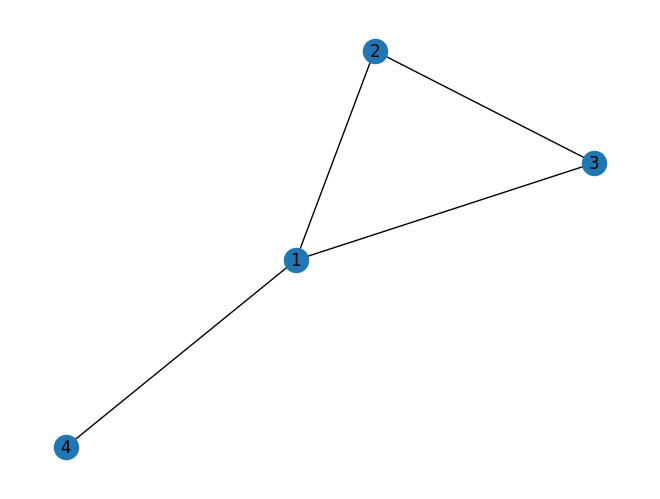

In [ ]:
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

In [ ]:
posicao = nx.spring_layout(G)
posicao

{1: array([-0.1397345 , -0.00514098]),
 2: array([ 0.58187024, -0.30527808]),
 3: array([0.55786427, 0.3472109 ]),
 4: array([-1.        , -0.03679184])}

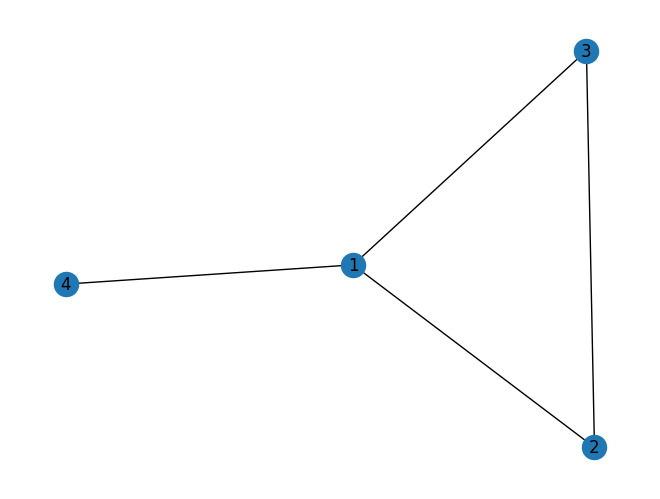

In [ ]:
nx.draw(G, pos=posicao, with_labels=True)
plt.show()

In [ ]:
print(type(posicao))  #vertice |---> coordenadas
posicao

<class 'dict'>


{1: array([ 0.13744951, -0.07919177]),
 2: array([-0.38090681,  0.65365872]),
 3: array([-0.75654271,  0.00168478]),
 4: array([ 1.        , -0.57615173])}

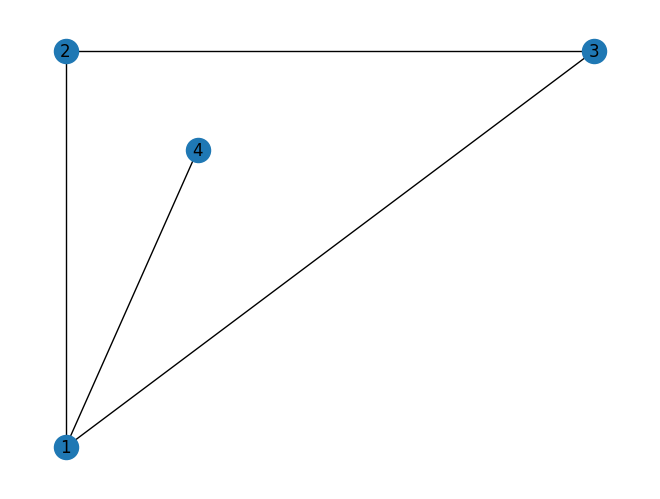

In [ ]:
minhapos = {
    1: [-1,-1],
    2: [-1,1],
    3: [1,1],
    4: [-0.5,0.5]
}
nx.draw(G, pos=minhapos, with_labels=True)
plt.show()

# Acessando informação de grau de vértices em (di)grafos

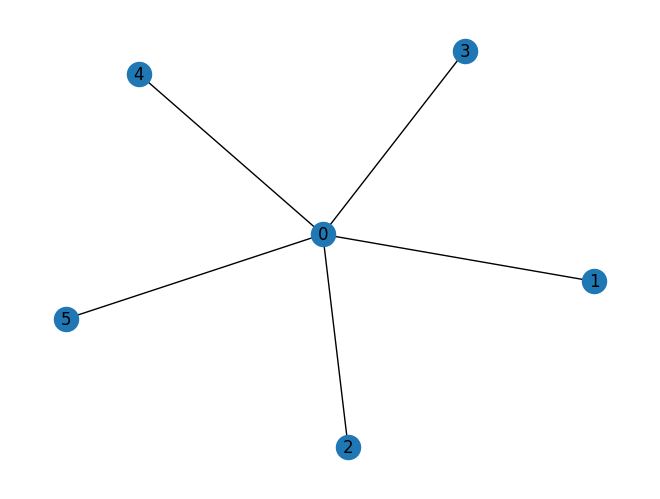

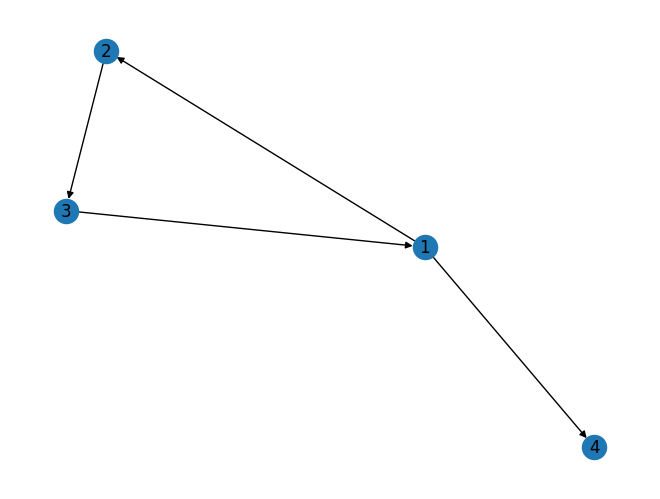

In [ ]:
G = nx.star_graph(5)
nx.draw(G, with_labels=True)
plt.show()

D = nx.DiGraph()
D.add_edges_from([(1,2),(2,3),(3,1),(1,4)])
nx.draw(D, with_labels=True)
plt.show()

In [ ]:
for node in G.nodes():
  print("O grau do vértice", node, 'é: ', G.degree(node))

O grau do vértice 0 é:  5
O grau do vértice 1 é:  1
O grau do vértice 2 é:  1
O grau do vértice 3 é:  1
O grau do vértice 4 é:  1
O grau do vértice 5 é:  1


No digrafo temos 3 tipos de grau
- o grau de entrada: quantidade de arestas que 'chegam' (incidem) no vértice
- o grau de saída: quantidade de arestas que 'saem' do vértice
- o grau total: soma dos dois

In [ ]:
for node in D.nodes():
  print("O grau total do vértice", node, 'é: ', D.degree(node))
  print("O grau de entrada do vértice", node, 'é: ', D.in_degree(node))
  print("O grau de saída do vértice", node, 'é: ', D.out_degree(node))
  print("----------------------------------")

O grau total do vértice 1 é:  3
O grau de entrada do vértice 1 é:  1
O grau de saída do vértice 1 é:  2
----------------------------------
O grau total do vértice 2 é:  2
O grau de entrada do vértice 2 é:  1
O grau de saída do vértice 2 é:  1
----------------------------------
O grau total do vértice 3 é:  2
O grau de entrada do vértice 3 é:  1
O grau de saída do vértice 3 é:  1
----------------------------------
O grau total do vértice 4 é:  1
O grau de entrada do vértice 4 é:  1
O grau de saída do vértice 4 é:  0
----------------------------------


# Exercício: Criar Grafo que vimos na aula teórica no slide 31 (aula 1)

Criando nodes

In [ ]:
numberToLetter = {1:'C',2:'Q',3:'T',4:'E'}
G = nx.Graph()
MATRIZ = [  #Assumir 1=Círculo, 2=Quadrado, 3=Triangulo, 4=Estrela
    [2,3,1,3,1,2],
    [3,3,2,1,2,3],
    [1,2,3,2,3,1],
    [3,1,2,4,3,3],
    [1,2,3,2,3,1],
    [2,3,1,1,2,3]
]

In [ ]:
'''posLinha = 6
posColuna = 1
for linha in MATRIZ:
  print('(',posLinha, end=',')
  for coluna in linha:
    print(posColuna,')', end="\t|\t")
    posColuna += 1
  posColuna = 1
  print('\n')
  posLinha -= 1
'''

'posLinha = 6\nposColuna = 1\nfor linha in MATRIZ:\n  print(\'(\',posLinha, end=\',\')\n  for coluna in linha:\n    print(posColuna,\')\', end="\t|\t")\n    posColuna += 1\n  posColuna = 1\n  print(\'\n\')\n  posLinha -= 1\n'

In [ ]:
nodes = []
i = 0
posColuna = 0
for linha in MATRIZ:
  for coluna in linha:
    posLinha =  abs(i-5) # 0 = 5, 1= 4, 2=3, 3=2, 4=1, 5=0
    print(i, posLinha)
    simbolo = MATRIZ[i][posColuna]
    simbolo = numberToLetter[simbolo]
    nodes.append((posColuna, posLinha, simbolo))
    posColuna += 1
  posColuna = 0
  i += 1

0 5
0 5
0 5
0 5
0 5
0 5
1 4
1 4
1 4
1 4
1 4
1 4
2 3
2 3
2 3
2 3
2 3
2 3
3 2
3 2
3 2
3 2
3 2
3 2
4 1
4 1
4 1
4 1
4 1
4 1
5 0
5 0
5 0
5 0
5 0
5 0


In [ ]:
pos = dict()
nodeNames = []
for i,j,s in nodes:
  node = str(i)+str(j)+str(s)
  nodeNames.append(node)
  pos[node] = (i,j)

In [ ]:
pos

{'05Q': (0, 5),
 '15T': (1, 5),
 '25C': (2, 5),
 '35T': (3, 5),
 '45C': (4, 5),
 '55Q': (5, 5),
 '04T': (0, 4),
 '14T': (1, 4),
 '24Q': (2, 4),
 '34C': (3, 4),
 '44Q': (4, 4),
 '54T': (5, 4),
 '03C': (0, 3),
 '13Q': (1, 3),
 '23T': (2, 3),
 '33Q': (3, 3),
 '43T': (4, 3),
 '53C': (5, 3),
 '02T': (0, 2),
 '12C': (1, 2),
 '22Q': (2, 2),
 '32E': (3, 2),
 '42T': (4, 2),
 '52T': (5, 2),
 '01C': (0, 1),
 '11Q': (1, 1),
 '21T': (2, 1),
 '31Q': (3, 1),
 '41T': (4, 1),
 '51C': (5, 1),
 '00Q': (0, 0),
 '10T': (1, 0),
 '20C': (2, 0),
 '30C': (3, 0),
 '40Q': (4, 0),
 '50T': (5, 0)}

## criando digrafo

In [ ]:
D = nx.DiGraph()
D.add_nodes_from(nodeNames)

In [ ]:
quadrados = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'Q']
circulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'C']
triangulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'T']
especial = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'E']

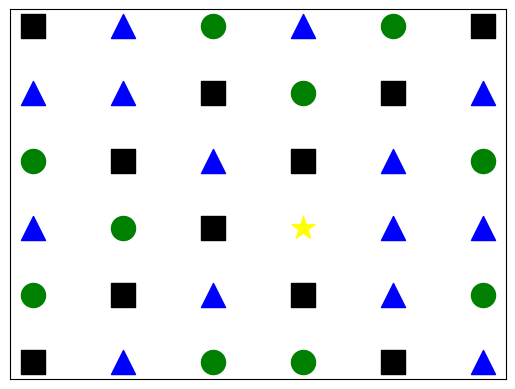

In [ ]:
nx.draw_networkx_nodes(D, pos, nodelist=quadrados, node_color='black',node_shape='s')
nx.draw_networkx_nodes(D, pos, nodelist=circulos, node_color='green',node_shape='o')
nx.draw_networkx_nodes(D, pos, nodelist=triangulos, node_color='blue',node_shape='^')
nx.draw_networkx_nodes(D, pos, nodelist=especial, node_color='yellow',node_shape='*')